### Sentimental Analysis of thw  Speeches addressed by Mohamed Sanusi Barkindo Secretary General of the Organization of Petroleum Exporting Countries during the year 2021.

   The Organization of Petroleum Exporting Countries is an international organization conformed by  13 countries  whose mission is to ensure an efficient and secure supply of oil  of supply to the consumers and a fair price for its member states.The OPEC has a large influence in the oil market,   coordinating   different  actions   with oil companies and non-OPEC country producers. In this point, the statements addressed by its  highest representative (the Secretary General) could have a great impact not only in the development of cooperation agreements among oil producers but also in the expectation of consumers and the stability of the market. This project points to perform a Sentimental Analysis of the  official speeches of the Secretary general  during the year 2021 using natural language tool kits, web scraping and data visualizations with Matplotlib. 
 

In [3]:
#First, we import the necessary tools to perform the web scraping and get the speeches from the OPEC official website.
import re
import pandas as pd
import matplotlib.pyplot as plt
import urllib
from bs4 import BeautifulSoup as bs
import urllib.request,sys,time
from bs4 import BeautifulSoup
import requests


In [4]:
url2021 =  'https://www.opec.org/opec_web/en/press_room/6297.htm' # store the link to the speeches in the year 2021i into the
                                                                  #url2021 variable
    


### Defining Functions to extract the speeches from the Website

In [5]:
tags = []
SG_speeches2021 = []
links2021 = [] 
titles = []
def html(url): #Defining the function HTML to convert the HTML code from the OPEC website in a Beatiful Soup object
    page = requests.get(url) 
    soup = bs(page.text,'lxml')   
    for tag in soup.findAll('a', attrs={'href': re.compile("^/opec_web/en/press_room/6")}): #links to the speeches starts with 6
        tags.append(tag)
        match = re.findall('Secretary General', tag.text)#filtering the speeches only to those adressed by the Secretary Genera(SG)
        if match:
            SG_speeches2021.append(tag)
            
def get_links(SG):           
 
    for link in SG:
        link_complete = 'https://www.opec.org'+ link.get('href') #completing the sub-links with the home website adress
        links2021.append(link_complete)
        
html(url2021) #applying the function to the URÖ 
get_links(SG_speeches2021)  #Getting the links to all the SG speeches
for link in  links2021:
    print(link) #Checking the links in to the tags
for tag in SG_speeches2021:
    titles.append(tag.text)
print(titles)

https://www.opec.org/opec_web/en/press_room/6753.htm
https://www.opec.org/opec_web/en/press_room/6746.htm
https://www.opec.org/opec_web/en/press_room/6697.htm
https://www.opec.org/opec_web/en/press_room/6640.htm
https://www.opec.org/opec_web/en/press_room/6638.htm
https://www.opec.org/opec_web/en/press_room/6497.htm
https://www.opec.org/opec_web/en/press_room/6484.htm
https://www.opec.org/opec_web/en/press_room/6449.htm
https://www.opec.org/opec_web/en/press_room/6416.htm
https://www.opec.org/opec_web/en/press_room/6406.htm
https://www.opec.org/opec_web/en/press_room/6401.htm
https://www.opec.org/opec_web/en/press_room/6393.htm
https://www.opec.org/opec_web/en/press_room/6363.htm
https://www.opec.org/opec_web/en/press_room/6335.htm
https://www.opec.org/opec_web/en/press_room/6295.htm
['Keynote address by OPEC Secretary General', 'Opening remarks by OPEC Secretary General', 'Opening keynote address by OPEC Secretary General', 'Closing remarks by OPEC Secretary General', 'Introductory re

The two functions worked perfectly extracting the links to the speeches, however the speeches appears as a set of sub-links into the HTML code, missing the main website "https://www.opec.org/" which was added as a string to complete the sub-links. Additionally, the speeches were also filtered only to those addressed by the Secretary General. Finally, we could confirm the list  printing the links and the titles of the desired speeches

### Analyzing the HTML code to extract the body of the speeches and separate the subtitles. 

In [6]:
speeches = []
for link in links2021:  
    page = requests.get(link)
    soup = bs(page.text,'lxml') #Getting the HTML code of each link
    page.text[0:100000]  
    #print(soup.html)  # overview the HTML codes

In [17]:
speeches = [] #filtering speech contents
subtitles = [] #filtering subtitles
for link in links2021:
    page = requests.get(link)
    soup = bs(page.text,'lxml')
    page.text[0:100000]

    for tag in soup.findAll('h5'): 
        subtitles.append(tag.text) #storing the subtitles from the nested tag "h5"
    for tag in soup.findAll("div", {"class" : "slim"}): # storing speech contents 
        soup.h5.decompose() # decompose() to get rid of the subtitles tags  nested in to the speech contents
        speeches.append(tag.text)

print(len(subtitles))
subs = []
print(len(speeches))
for sub in subtitles:
    sub = sub.replace("Delivered by HE Mohammad Sanusi Barkindo, OPEC Secretary General,","") #Deleting redundant information
    subs.append(sub)


15
15


As final result We have a total two lists, one  of 15 speeches  and another with the 15 subtitles, now we could proceed to analyze our data 

### Preparing Data Using NLTK 

Before use  any sentimental analysis package  we have to prepare our data making it more uniform. Firstly we have to separate the speeches into a list of words or tokens:

In [18]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ftfy

speech_tokens =[]
for speech in speeches:
    tokenized = [] #provisional variable to store speeches tokens
    text_tokens = word_tokenize(speech) #tokenizing speeches
    tokenized.append(text_tokens) #getting list of tokens
    speech_tokens.append(tokenized)#storing the list outside the loop
    
print(speech_tokens[0]) #  sample of tokens





[['Mr.', 'President', ',', 'Excellencies', ',', 'distinguished', 'delegates', ',', 'ladies', 'and', 'gentlemen', ',', 'It', 'is', 'a', 'distinct', 'honour', 'to', 'address', 'the', 'MSGBC', 'Oil', ',', 'Gas', 'and', 'Power', 'Conference', 'and', 'we', 'send', 'our', 'warmest', 'greetings', 'to', 'all', 'participants', 'and', 'delegates', '.', 'We', 'commend', 'the', 'wise', 'leadership', 'of', 'HE', 'Macky', 'Sall', ',', 'President', 'of', 'Senegal', ',', 'for', 'holding', 'such', 'a', 'forward-looking', 'and', 'innovative', 'conference', 'at', 'what', 'is', 'a', 'critical', 'juncture', 'for', 'the', 'energy', 'industry', ',', 'not', 'only', 'in', 'Mauritania', ',', 'Senegal', ',', 'The', 'Gambia', ',', 'Guinea', 'Bissau', 'and', 'Guinea', 'Conakry', ',', 'but', 'across', 'the', 'African', 'continent', 'and', 'indeed', 'the', 'globe', '.', 'I', 'would', 'like', 'to', 'thank', 'HE', 'Aissatou', 'Sophie', 'Gladima', ',', 'Minister', 'of', 'Petroleum', 'and', 'Energy', ',', 'for', 'the', 

As we can see above, apparently the speeches were written using a different encoding than 
the utf-8, most probably Arabian names and words  and the type of 
apostrophes used for the English language are showed  something like
"â\x80\x98". In addition, we need to  remove  the  stop words, and punctuation marks, and we will make them lower case to filter duplicates. 

In [32]:
cleaned_speeches2021 = []

# using the library fixes text for you to solve encoding problems "â\x80\x98"

for speech in speech_tokens:
    decoded = []
    cleaned_speeches2021.append(decoded)
    for word in speech:
        for character in word: 
            decoded.append(ftfy.fix_text(character))
            
print(cleaned_speeches2021[0])# a sample of tokens

['Mr.', 'President', ',', 'Excellencies', ',', 'distinguished', 'delegates', ',', 'ladies', 'and', 'gentlemen', ',', 'It', 'is', 'a', 'distinct', 'honour', 'to', 'address', 'the', 'MSGBC', 'Oil', ',', 'Gas', 'and', 'Power', 'Conference', 'and', 'we', 'send', 'our', 'warmest', 'greetings', 'to', 'all', 'participants', 'and', 'delegates', '.', 'We', 'commend', 'the', 'wise', 'leadership', 'of', 'HE', 'Macky', 'Sall', ',', 'President', 'of', 'Senegal', ',', 'for', 'holding', 'such', 'a', 'forward-looking', 'and', 'innovative', 'conference', 'at', 'what', 'is', 'a', 'critical', 'juncture', 'for', 'the', 'energy', 'industry', ',', 'not', 'only', 'in', 'Mauritania', ',', 'Senegal', ',', 'The', 'Gambia', ',', 'Guinea', 'Bissau', 'and', 'Guinea', 'Conakry', ',', 'but', 'across', 'the', 'African', 'continent', 'and', 'indeed', 'the', 'globe', '.', 'I', 'would', 'like', 'to', 'thank', 'HE', 'Aissatou', 'Sophie', 'Gladima', ',', 'Minister', 'of', 'Petroleum', 'and', 'Energy', ',', 'for', 'the', '

The library fixes text for you is an outstanding tool that help us to take words in a wrong unicode and then out the same word in the correct encoding.

In [20]:
stopWords = set(stopwords.words('english')) #preparing list of stopwords in English
s =  set(string.punctuation) # list of punctuation marks
Filtered_speeches = []
for speech in cleaned_speeches2021:
    filters =[]
    Filtered_speeches.append(filters)
    for word in speech : #converting each word in lower case to make them uniform
        low = word.lower()
        if low not in s and low not in stopWords: #filtering the lower case words in to the list of stopwords and punctuation
            filters.append(low)
#print(Filtered_speeches[9])

Finally, using the NLTK auxiliary libraries sting and stopwords ,we remove all the stopwords and punctuation marks simply iterating the 
function into the speeches and then in to the words. With the method .lower() we also make them lower cases. 

### Analyzing and Visualizing the Data 

Once our data is more uniform, we could start with the fun part.  Let's start just overviewing the most frequent words in the whole list of speeches, and plot them into a barchart.

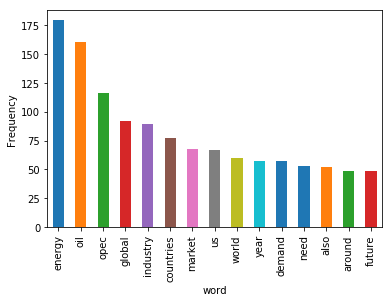

         word  frequency
0      energy        179
1         oil        160
2        opec        116
3      global         92
4    industry         89
5   countries         77
6      market         68
7          us         67
8       world         60
9        year         57
10     demand         57
11       need         53
12       also         52
13     around         49
14     future         49


In [22]:
from collections import Counter

freqdist = Counter() #Method to count words
for speech in Filtered_speeches: 
    freqdist += Counter(speech)

    
df = pd.DataFrame(freqdist.most_common(15), columns =['word', 'frequency']) #15 most used words

bar = df.plot.bar(x = 'word', y = 'frequency') #creating a dataframe for the word's frequency
plt.ylabel("Frequency")  
plt.legend().remove()


plt.show()
print(df)

The outcome is pretty straight forward, and we could see that the most common words are indeed related with the principal objectives of the organization, words  as: oil, market, energy  OPEC, global, among others 
 can be expected to appear many times throughout speeches.
On the other hand, other words  as "also" could suggest as an excessive use of a filler to add emphasis or remark a pause between the ideas.

### Sentimental Analysis

Now, we will perform a sentimental analysis of the speeches to differentiate the words with a positive, negative, and neutral value and its proportion among the speeches:

In [24]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
sid = SentimentIntensityAnalyzer() #instanciate an object of the class SentimentIntensityAnalyzer and store it in a variable (sid)
polarity =[]
string_speeches = []
for speech in Filtered_speeches:
    
    listToStr = ' '.join([str(elem) for elem in speech]) # converting the list of tokens into a string to apply the SentimentIntensityAnalyzer()
    string_speeches.append(listToStr)
    results = sid.polarity_scores(listToStr) # getting the polarity scores of each speech with the method polarity_scores()
    polarity.append(results)


df = pd.DataFrame(polarity) #displaying a data frame showing the polarity levels 
df['Speech'] = titles
df['subs']= subs
print(df)


    compound    neg    neu    pos  \
0     0.9997  0.050  0.711  0.239   
1     0.9994  0.053  0.688  0.259   
2     0.9996  0.058  0.723  0.220   
3     0.9979  0.008  0.714  0.279   
4     0.9993  0.009  0.723  0.268   
5     0.9995  0.027  0.704  0.269   
6     0.9998  0.050  0.716  0.234   
7     0.9965  0.062  0.767  0.171   
8     0.8885  0.112  0.734  0.154   
9     0.9976  0.077  0.736  0.187   
10    0.9929  0.077  0.742  0.181   
11    0.9989  0.025  0.702  0.272   
12    0.9984  0.060  0.718  0.222   
13    0.9998  0.044  0.708  0.248   
14    0.9967  0.108  0.713  0.179   

                                               Speech  \
0           Keynote address by OPEC Secretary General   
1           Opening remarks by OPEC Secretary General   
2   Opening keynote address by OPEC Secretary General   
3           Closing remarks by OPEC Secretary General   
4      Introductory remarks by OPEC Secretary General   
5           Opening remarks by OPEC Secretary General   
6       

As we can see above, we get 4 values: 
Compound: represent the final sentimental score, the closer to 1, the more positive score. The closer to -1, the more negative score.
Positive, Negative, and Neutral: show the proportion of these words in the whole speech.
The speeches were written with a diplomatic language  representing the position of the OPEC to different themes in official events,  it is normal to expect as the compound variable shows
that the speeches are closer to a positivity  and above the neutrality breach. Nevertheless, it would be interesting to display which words are classified as positive, neutral and positive

In [25]:

#filtering the words by it polarity level
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for speech in Filtered_speeches: #iterating the speeches 
    for word in speech: #iterating words 
            if (sid.polarity_scores(word)['compound']) >= 0.1: # Each word with + values is considered as positive
                pos_word_list.append(word)
            elif (sid.polarity_scores(word)['compound']) <= -0.1: #Each word with - values is considered negative
                neg_word_list.append(word)
            else:
                neu_word_list.append(word)      #Words with the value 0 are considered netural           



We got already three lists of negative, positive, and neutral words. However, the lists are pretty large and it would be necessary  to display them in a graphic way to have a closer look of the words. For this we would use the WordCloud package:

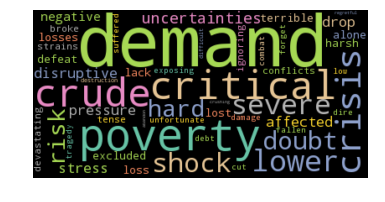

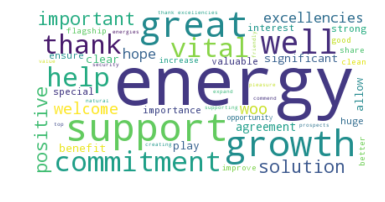

In [26]:
from  wordcloud import WordCloud
negative = ' '.join(neg_word_list) #converting the list of negative words into  string to create a wordlcoud
positive = ' '.join(pos_word_list) #converting the list of postive  words into  string to create a wordlcoud

negative = WordCloud(colormap = 'Set2',max_words = 50).generate(negative) #changing the color scale of the font, and quantity of words
positive = WordCloud(background_color='white', max_words = 50).generate(positive) # changing the background color of the positive words
plt.imshow(negative, interpolation = 'bilinear') #making the wordclouds more smoothly 
plt.axis('off') #Disable axis
plt.show()
plt.imshow(positive, interpolation = 'bilinear')
plt.axis('off')
plt.show() #show the wordcloud

The filter of words and its classification by polarity scores worked pretty well, we could see that the black words can be easily related with a negative effect  related to the  challenges of the oil market (critical, risk, debt, shock, etc.), while the white ones seems to be more positive  (commitment, energy, support, solution, growth, etc.). In a continuation, we will try to see the fluctuation of polarity levels among the speeches.

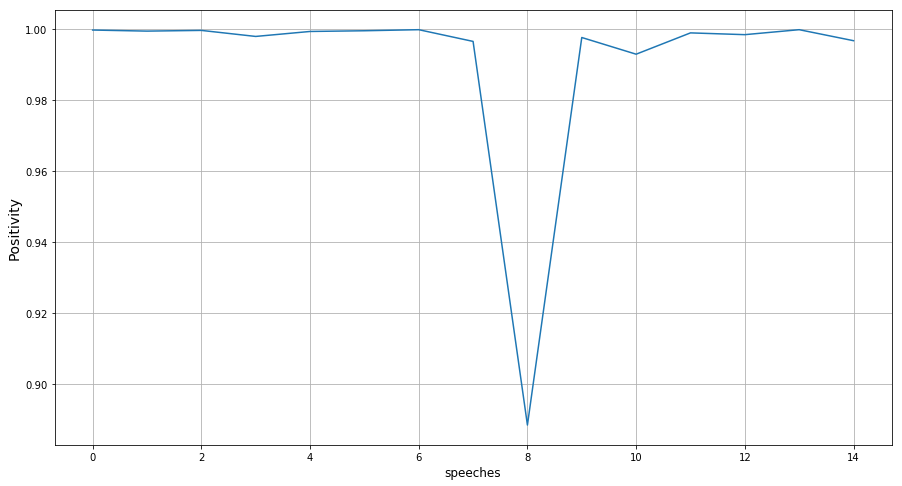

    compound    neg    neu    pos  \
0   0.9997    0.050  0.711  0.239   
1   0.9994    0.053  0.688  0.259   
2   0.9996    0.058  0.723  0.220   
3   0.9979    0.008  0.714  0.279   
4   0.9993    0.009  0.723  0.268   
5   0.9995    0.027  0.704  0.269   
6   0.9998    0.050  0.716  0.234   
7   0.9965    0.062  0.767  0.171   
8   0.8885    0.112  0.734  0.154   
9   0.9976    0.077  0.736  0.187   
10  0.9929    0.077  0.742  0.181   
11  0.9989    0.025  0.702  0.272   
12  0.9984    0.060  0.718  0.222   
13  0.9998    0.044  0.708  0.248   
14  0.9967    0.108  0.713  0.179   

                                                Speech  \
0   Keynote address by OPEC Secretary General            
1   Opening remarks by OPEC Secretary General            
2   Opening keynote address by OPEC Secretary General    
3   Closing remarks by OPEC Secretary General            
4   Introductory remarks by OPEC Secretary General       
5   Opening remarks by OPEC Secretary General            
6

In [27]:

df = pd.DataFrame(polarity) #Create a Dataframe  polartity results
pd.set_option('display.max_colwidth', -1) # Displaying the entire string for the subtitles
df['Speech'] = titles      #Adding titles
df['Subtitle']= subs # Adding subtitles




fig, ax = plt.subplots(figsize = (15,8)) #Making the plot bigger
ax.plot(df['compound']) #plotting variable compound
plt.grid(True) # seting grid lines in the background 
plt.ylabel('Positivity', fontsize=14) # naming y label


ax.set_xlabel("speeches",fontsize=12) # namingx label
plt.show()
print(df)


Even when the speeches have a mean  over 0.9 which is considered quite positive, we can note that  the speech number 8(9 if we are counting in the pythonic way) has a score below the 0.9. Although is still considered as positive, it represents a great different in relation with the constant. Let's compare the speech number 8 with the speech with the highest score, the number "0"

In [28]:

pos_8 =[]
neg_8 = []    #Words for speech number 8
neu_8 = []

pos_0 =[]
neg_0 = []    #words for speech number 0
neu_0 = []


for word in Filtered_speeches[9]: #Filterin the words by polarity in the speech 8(9 in pythonic)
            if (sid.polarity_scores(word)['compound']) >= 0.1:
                pos_8.append(word)
            elif (sid.polarity_scores(word)['compound']) <= -0.1:
                neg_8.append(word)
            else:
                neu_8.append(word)       
                
                
for word in Filtered_speeches[0]:##Filterin the words by polarity in the speech number 0
            if (sid.polarity_scores(word)['compound']) >= 0.1:
                pos_0.append(word)
            elif (sid.polarity_scores(word)['compound']) <= -0.1:
                neg_0.append(word)
            else:
                neu_0.append(word) 



Comparing the Proportions in Pie Charts: 

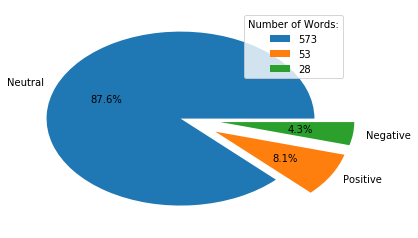

Total of Words: 654


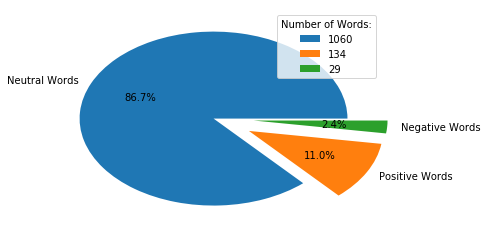

Total of Words: 1223


In [29]:

#Speech "8"
words = [len(neu_8), len(pos_8), len(neg_8)] #Counting Neutral, Positive and Negative Words
total = len(neu_8)+ len(pos_8)+ len(neg_8)
explodeTuple = (0.0, 0.3, 0.3) #Meassures to separate the values in the pie chart 
labels = ['Neutral', 'Positive', 'Negative']
plt.pie(words,autopct='%1.1f%%', labels = labels, explode =explodeTuple) #Ploting the Pie Chart including percentage of words
plt.legend(words, title = 'Number of Words:' )
plt.show()
print( 'Total of Words:', total)

#Speech "0"
explodeTuple = (0.0, 0.3, 0.3)
words = [len(neu_0), len(pos_0), len(neg_0)]
labels = ['Neutral Words', 'Positive Words', 'Negative Words']
plt.pie(words,autopct='%1.1f%%', labels = labels, explode =explodeTuple )
plt.legend(words, title = 'Number of Words:' )
plt.show()
total = len(neu_0)+ len(pos_0)+ len(neg_0)
print( 'Total of Words:', total)


With almost the half of the words in the speech number 8  doubled percentage of negative words with 4.3 % above the 2.4% of the speech "0".Even thoguht when it is a small percentage, it can explain the peak showed above in the line chart. Let's see which words are considered negative in the speech number 8

In [30]:
freqdist = Counter(neg_8)
print(freqdist)


Counter({'demand': 7, 'crude': 3, 'lower': 3, 'horrifying': 1, 'forget': 1, 'traumatic': 1, 'negative': 1, 'broken': 1, 'cautious': 1, 'hard': 1, 'doubt': 1, 'uncertainties': 1, 'obstacles': 1, 'debt': 1, 'pressures': 1, 'drop': 1, 'low': 1, 'severe': 1})


The word demand is one of the most frequent negative words in all the speeches, as we saw before in the wordcloud. In this regard, the word is also used more than 50% than the second one, "crude". If we place this in context the oil prices reached his top in the last 4 years overcoming the $80 per barrel. Among other factors, this increase in the oil prices was a consequence of the recovery post-covid experience during the second quarter of 2021 and a higher demand for oil products(Forbes, 2021). According to the Oxford Dictionary demand means "a very strong request for something; something that somebody needs"(Oxford,2021). Even when the statistical model used by the library SentimentIntensityAnalyzer also considered the word demand as a negative, I think the issue remains subjective and depends on the context in which it is used. For one side an increase in the demand of oil products can be seemed by oil producers as positive as long as they can covert it, on the other hand also means the increase of contaminant emissions. In this sense, applying the statistical models to analyze the sentiment of text can be a powerful tool to extract tendences from large data sets in an easy and faster way, however the interpretation of these results and the influence of the human factor can also affect the way in which we apply these methods. If we decide to exclude the word "demand" from the list of negative words, we could alter the polarity levels of the speech and the polarity constant displayed in the line chart.



Forbes, 2021. University of Houston Energy Fellows.$90 Oil By Year’s End? Post-COVID Oil Supply Can’t Keep Pace With Post-COVID Demand. https://www.forbes.com/sites/uhenergy/2021/09/30/90-oil-by-years-end-post-covid-oil-supply-cant-keep-pace-with-post-covid-demand/?sh=792f7ed048cf (4/2/2022)

Oxford, 2021. Oxford Learner's Dictionaries. https://www.oxfordlearnersdictionaries.com/definition/english/demand_1?q=demand 
(4/2/2022)